In [99]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [100]:
df = pd.read_csv('../data/dados_enem_2021_BA.csv')

In [101]:
# Exibir as primeiras linhas do DataFrame
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0


In [102]:
# Exibir as últimas linhas do DataFrame
df.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
266189,210051432069,2021,12,M,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,M,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918407,Juazeiro,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,210051995005,2021,11,M,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,210053234415,2021,12,M,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266193,210054027870,2021,5,F,1,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# quantidade de linhas x quantidade de colunas
# O resultado é uma tupla com o número de linhas e colunas
df.shape

(266194, 51)

In [104]:
# Sumário do DataFrame
# Número de valores não nulos, dtype de cada coluna, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266194 entries, 0 to 266193
Data columns (total 51 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            266194 non-null  int64  
 1   NU_ANO                  266194 non-null  int64  
 2   TP_FAIXA_ETARIA         266194 non-null  int64  
 3   TP_SEXO                 266194 non-null  object 
 4   TP_ESTADO_CIVIL         266194 non-null  int64  
 5   TP_COR_RACA             266194 non-null  int64  
 6   TP_NACIONALIDADE        266194 non-null  int64  
 7   TP_ST_CONCLUSAO         266194 non-null  int64  
 8   TP_ANO_CONCLUIU         266194 non-null  int64  
 9   TP_ESCOLA               266194 non-null  int64  
 10  TP_ENSINO               84388 non-null   float64
 11  IN_TREINEIRO            266194 non-null  int64  
 12  CO_MUNICIPIO_ESC        47820 non-null   float64
 13  NO_MUNICIPIO_ESC        47820 non-null   object 
 14  CO_UF_ESC           

In [105]:
# Verificar dados ausentes
df.isna().sum()

NU_INSCRICAO                   0
NU_ANO                         0
TP_FAIXA_ETARIA                0
TP_SEXO                        0
TP_ESTADO_CIVIL                0
TP_COR_RACA                    0
TP_NACIONALIDADE               0
TP_ST_CONCLUSAO                0
TP_ANO_CONCLUIU                0
TP_ESCOLA                      0
TP_ENSINO                 181806
IN_TREINEIRO                   0
CO_MUNICIPIO_ESC          218374
NO_MUNICIPIO_ESC          218374
CO_UF_ESC                 218374
SG_UF_ESC                 218374
TP_DEPENDENCIA_ADM_ESC    218374
TP_LOCALIZACAO_ESC        218374
TP_SIT_FUNC_ESC           218374
CO_MUNICIPIO_PROVA             0
NO_MUNICIPIO_PROVA             0
CO_UF_PROVA                    0
SG_UF_PROVA                    0
TP_PRESENCA_CN                 0
TP_PRESENCA_CH                 0
TP_PRESENCA_LC                 0
TP_PRESENCA_MT                 0
CO_PROVA_CN                90838
CO_PROVA_CH                81350
CO_PROVA_LC                81350
CO_PROVA_M

In [106]:
# Verificar porcentagem de dados ausentes
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

TP_DEPENDENCIA_ADM_ESC    82.035658
TP_SIT_FUNC_ESC           82.035658
SG_UF_ESC                 82.035658
NO_MUNICIPIO_ESC          82.035658
CO_UF_ESC                 82.035658
CO_MUNICIPIO_ESC          82.035658
TP_LOCALIZACAO_ESC        82.035658
TP_ENSINO                 68.298309
CO_PROVA_MT               34.124736
NU_NOTA_MT                34.124736
NU_NOTA_CN                34.124736
TX_RESPOSTAS_CN           34.124736
TX_RESPOSTAS_MT           34.124736
TX_GABARITO_CN            34.124736
TX_GABARITO_MT            34.124736
CO_PROVA_CN               34.124736
TX_GABARITO_CH            30.560418
TX_GABARITO_LC            30.560418
TX_RESPOSTAS_CH           30.560418
NU_NOTA_COMP3             30.560418
TP_STATUS_REDACAO         30.560418
NU_NOTA_COMP1             30.560418
NU_NOTA_COMP2             30.560418
NU_NOTA_COMP5             30.560418
NU_NOTA_COMP4             30.560418
NU_NOTA_REDACAO           30.560418
CO_PROVA_LC               30.560418
NU_NOTA_LC                30

In [ ]:
# Sumário estatístico do DataFrame
# 25%: Primeiro quartil
# 50%: Segundo quartil (mediana)
# 75%: Terceiro quartil
df.describe().transpose()  # transpose: coluna vira linha e vice-versa

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,266194.0,2.100527e+11,981957.687860,2.100510e+11,2.100519e+11,2.100527e+11,2.100536e+11,2.100545e+11
NU_ANO,266194.0,2.021000e+03,0.000000,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03,2.021000e+03
TP_FAIXA_ETARIA,266194.0,5.710166e+00,3.878161,1.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00,2.000000e+01
TP_ESTADO_CIVIL,266194.0,1.048991e+00,0.411030,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_COR_RACA,266194.0,2.301832e+00,0.907761,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
TP_NACIONALIDADE,266194.0,1.029787e+00,0.194507,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_ST_CONCLUSAO,266194.0,1.595810e+00,0.719902,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
TP_ANO_CONCLUIU,266194.0,2.846845e+00,4.468500,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.500000e+01
TP_ESCOLA,266194.0,1.379663e+00,0.570947,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
TP_ENSINO,84388.0,1.013272e+00,0.114438,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [108]:
# Index do DataFrame
df.index

RangeIndex(start=0, stop=266194, step=1)

In [109]:
# Quantidade de valores únicos por coluna
df.nunique().sort_values(ascending=True)

NU_ANO                         1
SG_UF_PROVA                    1
CO_UF_PROVA                    1
TP_SEXO                        2
TP_ENSINO                      2
TP_LOCALIZACAO_ESC             2
IN_TREINEIRO                   2
TP_LINGUA                      2
TP_PRESENCA_CN                 3
TP_PRESENCA_CH                 3
TP_PRESENCA_MT                 3
TP_PRESENCA_LC                 3
TP_ESCOLA                      3
TP_DEPENDENCIA_ADM_ESC         4
TP_SIT_FUNC_ESC                4
TP_ST_CONCLUSAO                4
TP_ESTADO_CIVIL                5
TP_NACIONALIDADE               5
TP_COR_RACA                    6
TX_GABARITO_MT                 8
TX_GABARITO_CN                 8
TX_GABARITO_CH                 8
TP_STATUS_REDACAO              8
TX_GABARITO_LC                10
NU_NOTA_COMP2                 10
NU_NOTA_COMP1                 11
NU_NOTA_COMP4                 11
NU_NOTA_COMP3                 11
NU_NOTA_COMP5                 11
TP_ANO_CONCLUIU               16
CO_PROVA_M

In [110]:
# Verifica a classe do DataFrame
type(df)

pandas.core.frame.DataFrame

### Seleção de colunas

In [111]:
# Método 1
df.TP_ESCOLA

0         2
1         2
2         2
3         1
4         1
         ..
266189    1
266190    1
266191    1
266192    1
266193    1
Name: TP_ESCOLA, Length: 266194, dtype: int64

In [112]:
# Distribuição de valores únicos por coluna
df.TP_ESCOLA.value_counts()

TP_ESCOLA
1    177170
2     76984
3     12040
Name: count, dtype: int64

In [113]:
# Método 2
df['TP_ESCOLA']

0         2
1         2
2         2
3         1
4         1
         ..
266189    1
266190    1
266191    1
266192    1
266193    1
Name: TP_ESCOLA, Length: 266194, dtype: int64

In [114]:
# Método 3
# .loc: seleciona colunas pelo label
# sintaxe: df.loc[linhas, colunas]
df.loc[:, 'TP_SEXO']

0         F
1         F
2         F
3         F
4         M
         ..
266189    M
266190    M
266191    M
266192    M
266193    F
Name: TP_SEXO, Length: 266194, dtype: object

In [115]:
# Seleciona múltiplas colunas
# O retorno será um novo DataFrame com as colunas selecionadas
df[['TP_SEXO', 'TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,2
1,F,2
2,F,2
3,F,1
4,M,1
...,...,...
266189,M,1
266190,M,1
266191,M,1
266192,M,1


In [116]:
# Selecionar múltiplas colunas com .loc
df.loc[:, ['TP_SEXO', 'TP_ESCOLA']]

,TP_SEXO,TP_ESCOLA
0,F,2
1,F,2
2,F,2
3,F,1
4,M,1
...,...,...
266189,M,1
266190,M,1
266191,M,1
266192,M,1


In [117]:
# .iloc: seleciona colunas pelo índice (posição)
# sintaxe: df.iloc[linhas, colunas]
df.iloc[:, 0]

0         210051128744
1         210054173438
2         210052118573
3         210052350230
4         210053156861
              ...     
266189    210051432069
266190    210051106175
266191    210051995005
266192    210053234415
266193    210054027870
Name: NU_INSCRICAO, Length: 266194, dtype: int64

In [118]:
df.iloc[0:5, 0]  # Seleciona as primeiras 5 linhas da primeira coluna

0    210051128744
1    210054173438
2    210052118573
3    210052350230
4    210053156861
Name: NU_INSCRICAO, dtype: int64

In [119]:
df.iloc[:, [0, 1]]  # Seleciona as colunas de índice 0 e 1

,NU_INSCRICAO,NU_ANO
0,210051128744,2021
1,210054173438,2021
2,210052118573,2021
3,210052350230,2021
4,210053156861,2021
...,...,...
266189,210051432069,2021
266190,210051106175,2021
266191,210051995005,2021
266192,210053234415,2021


In [120]:
df.iloc[0:5, 0:3]  # Seleciona as primeiras 5 linhas e as primeiras 3 colunas

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA
0,210051128744,2021,4
1,210054173438,2021,5
2,210052118573,2021,3
3,210052350230,2021,10
4,210053156861,2021,9


### Seleção de colunas por tipo

In [121]:
# Seleciona colunas númericas
df.select_dtypes(include=[int, float])

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2927200,29,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,1,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,1,2,1,2,0,2,1.0,0,2927408.0,29.0,1.0,1.0,1.0,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2903201,29,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,0,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2928802,29,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,0,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2910800,29,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,0,1.0,100.0,120.0,100.0,120.0,100.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,210051432069,2021,12,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2900702,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2918407,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,210051995005,2021,11,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,210053234415,2021,12,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# Seleciona colunas do tipo string (object)
df.select_dtypes(include=[object])

,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT
0,F,NaN,NaN,Ruy Barbosa,BA,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB
1,F,Salvador,BA,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,NaN,NaN,Barreiras,BA,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE
3,F,NaN,NaN,Santo Estêvão,BA,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA
4,M,NaN,NaN,Feira de Santana,BA,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,M,NaN,NaN,Alagoinhas,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,M,NaN,NaN,Juazeiro,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,M,NaN,NaN,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,M,NaN,NaN,Salvador,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# Seleciona colunas númericas excluindo as do tipo string (object)
# É uma forma alternativa de selecionar colunas númericas
df.select_dtypes(exclude=[object])

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2927200,29,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,1,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,1,2,1,2,0,2,1.0,0,2927408.0,29.0,1.0,1.0,1.0,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,2903201,29,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,0,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2928802,29,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,0,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2910800,29,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,0,1.0,100.0,120.0,100.0,120.0,100.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266189,210051432069,2021,12,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2900702,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2918407,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266191,210051995005,2021,11,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266192,210053234415,2021,12,2,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,2927408,29,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# Seleciona colunas categóricas e converte para uma lista
cat_cols = df.select_dtypes(include=[object]).columns.tolist()
cat_cols

['TP_SEXO',
 'NO_MUNICIPIO_ESC',
 'SG_UF_ESC',
 'NO_MUNICIPIO_PROVA',
 'SG_UF_PROVA',
 'TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [125]:
# Seleciona colunas númericas e converte para uma lista
num_cols = df.select_dtypes(include=[int, float]).columns.tolist()
num_cols

['NU_INSCRICAO',
 'NU_ANO',
 'TP_FAIXA_ETARIA',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

### Filtros

Existe diferença na nota de matemática entre alunos de escola pública e privada?

In [126]:
# Alunos de colégio público
df.query('TP_ESCOLA == 2').NU_NOTA_MT.mean()

np.float64(487.37504991538157)

In [127]:
# Alunos de colégio privado
df.query('TP_ESCOLA == 3').NU_NOTA_MT.mean()

np.float64(579.8338996340826)

In [128]:
# Alunos de colégio privado
df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.mean, np.median])

mean      579.8339
median    581.6000
Name: NU_NOTA_MT, dtype: float64

In [129]:
# Alunos de colégio público
df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.mean, np.median])

mean      487.37505
median    468.90000
Name: NU_NOTA_MT, dtype: float64

In [130]:
# 1 Condição
df.query('TP_SEXO == "M"').sample(5)  # amostra aleatória de 5 linhas

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
47926,210052096450,2021,3,M,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2926004,Remanso,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,410.2,364.4,390.5,391.9,DADEDACDCDDEEACBCAACBBECDBECDBACDAEDABAAACBDD,AECBCDEBEEACDBEADEADABDDABCEACABDDABACDBDBBCA,DCCEB99999BBDCEADEABADBEACAEABCDCEADCEBECEEDAC...,BACDBCDAECBABEEACBDABBCEACBABBCBBACBBAEDBBDDA,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,80.0,120.0,80.0,500.0
156014,210053598210,2021,15,M,2,3,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,587.3,643.4,610.6,716.2,CABBBDCBECCABACACACCCDBCBABCEDABBAECEDCBBCCEB,EAAEAADBEDEADABDECBAAEEBBBADCDCCBCECCEEBCAEAB,ACAAB99999DCEABABCAADCEADDAEDBDDDBEDDADCDBDCCE...,DCCAEBACDEEDCEECABCCEDADDCDDCAECADBADBCABEECD,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,140.0,140.0,100.0,120.0,180.0,680.0
134563,210052271443,2021,3,M,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,642.1,681.1,616.6,669.4,AAEBABECABCCBBDACACBBBEDECADEDACBCDACABDBADCD,ECECCAECBADBCAECAAEEBDEBBBADBCBAABADBBACCEBBA,AECAC99999CEADCACEBEDBBDCBDBADDBBEADCEEAABCBAE...,ECDEBACDDEBCCDBAEEEBBEAEDEDBCABBABAEBCADDDEAD,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,160.0,200.0,160.0,180.0,200.0,900.0
200663,210051134524,2021,4,M,1,1,1,2,0,2,1.0,0,2910701.0,Euclides da Cunha,29.0,BA,1.0,1.0,1.0,2910701,Euclides da Cunha,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255059,210053342272,2021,3,M,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
# Validando nossa consulta
# .unique(): retorna os valores únicos da coluna
# Neste caso, o resultado será um array com o valor 'M', pois estamos filtrando apenas os alunos do sexo masculino.
df.query('TP_SEXO == "M"')['TP_SEXO'].unique()

array(['M'], dtype=object)

In [132]:
# 2 Condições de tipo AND
# Seleciona alunos do sexo masculino que são treineiros
df.query("(TP_SEXO == 'M') & (IN_TREINEIRO == 1)").sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
59264,210052189033,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2930709,Simões Filho,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,517.9,466.3,551.0,642.9,AAEACCCBBEEDCBDADBEBABDEBDECCCEEBBEBCDBCAEDCE,BABCDCAADEEBEAACCAAABCEEEEABCDCDCDBBCBABCEDEC,BAABC99999ABCDEABEDEDEBDBADBCADCCADACADDEACAED...,DDCDCDDBACABECCADCADEECDBEDBCBECACDCEBEBCCBAB,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,180.0,160.0,140.0,120.0,760.0
181555,210053226646,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,501.5,381.4,448.7,470.0,DABDDADBCDBECCEBAAEECEDDAADEECCEEEABCCBACDCAE,EDDDDAADCDBEBEADEEABCDECADDCAECCDCACBDBBECBEE,DBDAE99999DBADEDBBAEEAEEDCCEDECDCEECBCDCCCDDAE...,ADBEBBAADCCBEEAADEBAECDBDEDEACAEECCCCDCBDBCAE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,100.0,140.0,120.0,600.0
162693,210054236794,2021,2,M,0,0,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,391.2,410.4,432.3,410.9,DBAEECADBDDBAEDBDCADADDCEABBEADAEBCAADDACBBCC,ADCAEEEEBDAABAAAEBAADCABEADBDCBBBECDCDAACBBDA,99999DDAAEDCCDBADCEEEABCDBDCBAADACEABDEABEACED...,DAEBCAADDACBBBCBAEDCADCAACEDABECAABDEABDCBEDB,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,120.0,100.0,120.0,120.0,580.0
222526,210052189355,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,556.8,508.3,462.5,587.1,BBECDABBABDCEBCBCCDBEECCEEBAEEDCDCDDEECBBABAC,DEECAEDCBADDAAEECEADBAABEDAADBABBDEEBBEEABADA,BACEE99999ACBCDCCAEBADBAADECA*DBCDEDECBAADBDAC...,EADCCDEDCDACEECABCEEEBADDAECACE*DDCBDCBABDEAD,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,140.0,180.0,140.0,140.0,120.0,720.0
25549,210051231943,2021,1,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2906808,Cansanção,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,370.3,398.4,401.3,462.6,DAECEBADDBCABDCCEBACDAEEE.*ECEDAACCDACEDDACCB,BACBDEAACDDAECBDDBCDABDBABABCDECEBAECBDACCBCD,99999ACCDBDEBECDEDABEBBCEBCEEECBDBEDEAADBABBDA...,CBCEECBB*CDEEADCCEEBABEEBCDAAEABCCBEEDDCBCCCE,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,100.0,80.0,100.0,80.0,440.0


In [133]:
# 2 Condições de tipo OR
# Seleciona alunos do sexo masculino ou que são treineiros
df.query("(TP_SEXO == 'M') | (IN_TREINEIRO == 1)").sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
113493,210053132327,2021,5,M,1,3,1,2,0,2,NaN,0,2905701.0,Camaçari,29.0,BA,2.0,1.0,1.0,2905701,Camaçari,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104845,210053319495,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2919207,Lauro de Freitas,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,603.7,576.5,499.6,691.0,ABDECCCECDCABBCCACEAABCEDDADEDABBEAABCADDDECE,EADDECDBCDCCABBCDBAABBECCAEDDDDBAEBBDAAACBBDC,EAACB99999DBCBEADBBDEBDBDCABDEDCBACBECACDDCACB...,BECABDCBAEBABCBBDEAAEACDCAECCBCCCABECCEBBCAEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,200.0,120.0,120.0,120.0,680.0
228792,210054068263,2021,5,M,0,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,512.3,508.1,425.5,472.2,BCBEADBAABCDADCCADEBCEBDCAABEBEDAAEDCCADBBADB,CBCECEBCDABDAACBDBEDDBEDBDABACDBAEBBCBDECAEBD,99999ADACDCEBBCDCCADDAEBCBAEEBCDAEBDCBAADCEBAB...,EAAACCDEECAABBECEDCAABACDBCAAEBCDCABDDBDDEACD,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,100.0,120.0,0.0,440.0
52061,210054226732,2021,3,M,1,2,1,2,0,2,1.0,0,2933307.0,Vitória da Conquista,29.0,BA,2.0,1.0,1.0,2933307,Vitória da Conquista,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,473.1,460.9,499.4,438.5,BBECACCCADDAACCBBDCACEBEACEADDCBBDDECBCCBCAEB,BE*CCCEBBACCCDAAAAEBDBCAACBECBEBCB.DABECBACAE,99999CBBEACDBBEACEDDDABDCDCBDBBDBEEDADDBACCABA...,CEBDDBBEDACBACACBBDEBAACDCBBBCDBBABDBAEDDABBA,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,160.0,160.0,680.0
236825,210053410989,2021,16,M,2,1,1,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2902708,Barra,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,403.3,473.5,442.6,407.3,ADAAACADBCCDEAADEDEDCBAEAEAAADCACEBDAAEDAAECB,DECCDAAADAEBAABDDBAADBABCBEBBBDEADADCAAAADBBA,ACEBA99999BBAAEAEADCADDCABAABADECACADABEABAEAE...,BAECDADACDAAAABADBDDCABDACEEADBAEDEAECBEADEDA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,6.0,0.0,0.0,0.0,0.0,0.0,0.0


### Máscara Booleana

In [134]:
# Máscara booleana
df.TP_SEXO == 'M'  # Retorna uma série booleana

0         False
1         False
2         False
3         False
4          True
          ...  
266189     True
266190     True
266191     True
266192     True
266193    False
Name: TP_SEXO, Length: 266194, dtype: bool

In [135]:
# DataFrame com máscara booleana
mask = df.TP_SEXO == 'M'
df[mask]  # Retorna um DataFrame filtrado com base na máscara booleana (apenas alunos do sexo masculino)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
7,210053790986,2021,1,M,1,1,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2907202,Casa Nova,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,590.9,659.7,593.6,586.8,BADCBEEBECDDEABAEDEBCDCCDABBBEBBDDACCCADBEACE,EBBBEADACABBBADEECBAAEDDBBADCDADBCADDEBBCCEAB,ACBAB99999DCEADCADACBDEAEDDABDADCBBBDABCDDDECB...,DDEBEEEDDDCAEEBACBEAADDDCCEDEEBABEECEBEEBCAAC,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,180.0,160.0,200.0,200.0,900.0
9,210054171092,2021,4,M,1,2,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,210052237624,2021,5,M,1,2,1,2,0,2,1.0,0,2910503.0,Entre Rios,29.0,BA,2.0,1.0,1.0,2910503,Entre Rios,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,594.4,572.8,536.6,469.6,DCADABEEABDAEDABADCABEACABDAEBECBBBDCCCDBCBCD,BEECCABABABBEAEACBADCAEBEDAABAEAEADCCCAAEEBAA,ABBAB99999ADDBAABABCBBBACADAEDBBCCEEEBEAACCDBE...,DABEACCEACAACBBABBBACCAACBBAAECBBCBEBCCCBABBD,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,100.0,80.0,80.0,80.0,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266185,210052439300,2021,8,M,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266189,210051432069,2021,12,M,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266190,210051106175,2021,14,M,2,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918407,Juazeiro,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN

In [136]:
# Outra forma de fazer a mesma coisa
df[df.TP_SEXO == 'M'].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
157979,210051414647,2021,6,M,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2923803,Paripiranga,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61577,210054456796,2021,9,M,1,2,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231332,210054216701,2021,5,M,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2924405,Pilão Arcado,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,491.0,545.7,465.7,437.4,EBEACCCDDCCAEEDABEDDAEBCCAAADCEBBDCAEBADEADEE,BDEABBDDEEADEBAACBBACDACCAABDDCBBCEDAABAACBAB,AACEC99999AACDEADCEEAAADCADAEDDEAABBCDDDAEBEDB...,CBACBACEBBABBEDECCAEBADEADCABDBAAECEEBEDACCDA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,80.0,120.0,80.0,80.0,100.0,460.0
4798,210052039529,2021,3,M,1,1,1,2,0,2,1.0,0,2900355.0,Adustina,29.0,BA,3.0,1.0,1.0,2923803,Paripiranga,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,534.7,384.0,454.5,602.3,DDCCBEEBECDCCDDEEDDADDCCBABCDBDEDDBBCCCEDCDAD,EECDEDABBCCAEABDBDDBAADCABEEBEDECBACBDECDEDEE,CAAAB99999DCBBBBBCADBDEAABDEBBDDCDBCDCBBEBCCAA...,EBCAEDACDDECDEBADBDCEDBDCCDEBDCCCCBCCCBBDCDDD,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,160.0,120.0,120.0,140.0,160.0,700.0
146303,210051203564,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933307,Vitória da Conquista,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,544.5,543.5,495.2,596.3,ACEDADBEDBCCAECBEDDCBECCAABDABDDDAEACCADBAAEC,ADEBCAEBCABBEACEDCBBDEEBECBADCBBACDADDACEAEBA,BCEBD99999ADBCCEEDBDCDEDCCABEDDBDBCDDCACBCDEAB...,DBAEDECDCDCCCDBCACBBAABEDBBAAACCEAEAECEAEEEAB,0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,120.0,120.0,120.0,180.0,100.0,640.0


In [137]:
# Usando o método .loc para filtrar
df.loc[df.TP_SEXO == 'M'].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
261888,210052342986,2021,11,M,2,3,1,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2930501,Serrinha,29,BA,1,1,1,1,1048.0,1018.0,1027.0,1037.0,500.0,494.5,494.0,449.8,DDDBAACEEEABDEEEBABEECDDCCEAAACBEDCEBBEABBBCC,ECCEDEAEAAAACCCEEBEECCBACAAECACDEECAEADECBDAB,EBCCE99999EEEBACCAEADCAEEEBAEAEEACADECCEAEEBEB...,ADABEBECBBCBEBAADBEBCBCBEDADADECDDDCADDCBCAEC,0,CDAAACCAEEADEACBACBDABBACEEBEEDCCAECDDAAEABAC,EDAEEDBDBABBCCDEABACBCBACABABABEEBAAEBEDDDBBA,CECADBCEBCEAEDACCBEACBACEBADADDAAAAAEBBDADCABB...,ACDBBDBBCDEDEACBEBBBDCADCBADBBEDBCCEDBACBDEAB,1.0,80.0,120.0,100.0,80.0,20.0,400.0
124430,210051163924,2021,3,M,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2929909,Seabra,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,466.6,574.3,484.4,684.3,CECABBDDDEABDCBEEEACCBDABDABBDCCCDBABDDDECEAA,CBAADADBBBACEACEABDC.CBEACCECBECDBBEDACACBACC,ADCEA99999DDBDCBEACCDBEAAED**BDBDEBDDBBAECDDEA...,ECCEBEBECEDDAEDACACDCEEDACBADBDDCAECDDBBEBDCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,120.0,140.0,180.0,660.0
248919,210052219120,2021,12,M,1,2,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2913606,Ilhéus,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252092,210052739135,2021,12,M,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188234,210054128998,2021,5,M,1,1,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,610.4,612.6,641.4,726.9,CDCDBDABEEBEEEDABBBBDEDABDDDEADDBCAABAEBBEBDB,DBBBAECBBAAACEECAAAAADBEACAEABDDDEEBDCADABADC,ABBBA99999CDDDCDEAACBBEEBEBBACEADCEBBDACAEDDDB...,DCCCDDBDBCBDEBDDCABDEBEBADBEBEDCCDEEDDBDDDC.C,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,160.0,180.0,160.0,180.0,200.0,880.0


In [138]:
# Máscara com múltiplas condições
df[(df.TP_SEXO == 'M') & (df.IN_TREINEIRO == 1)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
145571,210052863017,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,471.8,430.6,463.1,605.3,CACABCACCCDAABDEEBCDAAEECABBCCACDCCEBAABCEEEA,CAAAAEBDBBEEDCBCDBEADACDBBDDACCADDCCBAEBEECAB,ABBCB99999CDDABBDBCEAEABCDDBEBBAAABACBACBDDACD...,ACBACABAADDECBEECADADEEBBCCADBCCCABDCDEBEABDB,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,140.0,120.0,120.0,140.0,640.0
232847,210053758896,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925501,Prado,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131486,210052630210,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2925303,Porto Seguro,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,504.3,615.7,588.8,649.4,CDCABBACDBBBDCDCABEBDBCABADCACBEEDBEAACDDCDDA,DBBAAEEEBBBAEECEAADEACBEACAABBBBBABBBBDBCAABA,ABBCA99999CDEADDCACBDBEACECDADEADCDBDCACCAAAEB...,AACBCDBEABDDCADDCDBDAAEC*BCCBBCCBECAEDBDEDCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,140.0,100.0,120.0,60.0,520.0
146843,210052648083,2021,1,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2918357,João Dourado,29,BA,0,1,1,0,NaN,879.0,889.0,NaN,NaN,380.7,495.5,NaN,NaN,ECDABCDABDABBAEDCAABCBACDAECCEACEBECCAEDABDAE,99999DDABABBCDECDBCCBBEBCACBDCACBDAABDBCBDBCEA...,NaN,1,NaN,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,NaN,1.0,100.0,120.0,100.0,120.0,60.0,500.0
126320,210051151457,2021,2,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,420.1,446.5,377.8,454.8,CCCDBECEBDDABBCEACEECDDCCDBCEEBDCCDCBEBCDBDCE,DAAACEBAABACBCCDBEBCAADEBCAEEBBACEDEDEADDDECA,99999ABBCCBEEAABAEDDEADEEDDBBEBCBACABCEACAEAEC...,CAEDCACBCEAEAAABDBCDDEECDDBDADBABADCBCBBCDCAB,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,120.0,140.0,140.0,640.0


In [139]:
# Máscara com múltiplas condições e com .loc
df.loc[(df.TP_SEXO == 'M') & (df.IN_TREINEIRO == 1)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
143626,210052003311,2021,2,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,587.5,692.2,592.8,652.4,AECECCCDCEDDEDACBEEAABBCADEEDECBECBDDCAADACAE,BAECBADBCEBBEBBABECABEECCAEBBCEAAECBBABBAEECB,BAABC99999BDDDCAEEEEAADDDABBDAAEACAACDBDBAAACC...,DDCDCDBCDDCDBCBBACADEEADCCCDCBCAACDAECEABDCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,200.0,140.0,180.0,200.0,880.0
35012,210053597401,2021,7,M,1,2,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2930501,Serrinha,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,352.8,529.5,441.3,444.2,BDDDEBDAAACDBEEAEAECABCEDCDDCBBDBDDAECBACBACA,BDECCEEBAEEDEAEACCBDCEABADAADEBBAEDACBDBDCDBB,99999BCBDEABBBDDDCACDDBDAEDBDABBADCDEEBBDEBBBC...,DEEDACEBDCEABDACDBACACADDEEBBDDCDBCDAEBDACEAD,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,4.0,0.0,0.0,0.0,0.0,0.0,0.0
122131,210051918773,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,463.9,401.8,380.5,429.3,BAEEDCAEDCDDAECCEBEDABCDBAEEBDEBECCDABEDBDBCD,DAECABADBDBADBAACEC*DBCDDACBDEAACDBEBEBDCDBBA,99999BCEEAACEBBADCDCADEDCDCBEEBCAACEADABDBBCAE...,DCDBBABECEEACCCACCBEAABDCEABDAABACEDABCDDBADA,1,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,140.0,140.0,100.0,120.0,100.0,600.0
150447,210053739960,2021,3,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2926400,Riacho de Santana,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,504.3,437.2,445.1,494.9,DCACAEBAECBADAEDADEBCAECBBDAAEACEAADCBEDCBACA,CAACCBEBBAABDDBBADCBADACDDACACBAACCDAADBABBCE,99999EDAAEDCBCDCAAADBEDABEEBAAEABDAAEBECCDADAB...,EEEEEBEDBDCBCEBAEEBAEDABBDCACABADCEDABABBBCDC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,120.0,600.0
18626,210053346875,2021,2,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2929107,São Felipe,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,356.0,503.0,444.4,514.2,CEDCBDEBCCCDCCDAEBEAABCCACCE*EACEAAEADADACABE,CBDCCAEACAECDDDCABEBEEABDBAADEDACEBCABEDBBCDA,99999AACDDADBBCCDBABEABADCCAEBABEEEEADDACBBABB...,EAAEECBECEBACDDCEAEAAECABEACABBEADACDDACCDDBC,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,100.0,120.0,120.0,120.0,0.0,460.0


In [140]:
# Dica de boas práticas:
condition_1 = df.TP_SEXO == 'M'
condition_2 = df.IN_TREINEIRO == 1
df.loc[(condition_1) & (condition_2)].sample(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
95622,210052654128,2021,4,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2905206,Caetité,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92492,210052324631,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,362.6,393.8,422.8,496.7,ADADDCCDEBABDCEECCABAABDCCBEACEBABABBECDAADCD,CAEAAAABACAADEBDABAABBAEBCACADACBADDDCADEDDEE,ACADE99999DBCAABAAEBDAEEBCCBEEEAEACECADABDBCBA...,EADBABCBBCDEAADBDBDDDACBECCD*AAABABBBDEBABCDE,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,120.0,560.0
1587,210051593778,2021,3,M,1,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2933307,Vitória da Conquista,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,497.8,487.3,533.8,524.3,BBDACCBDEEBDBCDABDADBDDBADCBCCDBAEACECCBEEADB,BEDCDABBCCDBBCDDEBBCCABBDBCBBCBDCECBBCBDABEDB,EAADA99999BCCDE*DEBACBDDAEDDEABDACCACCDBDACADC...,BDCACBDECBDDBCBAACEDBABDDCBAEBDBCDECDBEDDBADA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,140.0,180.0,120.0,140.0,140.0,720.0
107391,210052684968,2021,1,M,0,3,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914802,Itabuna,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,537.5,574.8,529.1,589.7,CDCBEDACBEBBCECADEDBCDDCBDDEBABDDCDABCADAECDC,DBBBADEEBDABCECDCABEAECEDCAABDDDEED*DCABCBDDC,DBECB99999BDEAEBBAACBCEEDDAEACCADEDBDCDCBEDBDC...,ACDBBBBBCEDCEDDEDCDEAAEBAEDBCBBDCDCBEEBCAAECC,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,120.0,120.0,100.0,580.0
3574,210053224975,2021,1,M,1,1,1,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,587.2,695.0,632.9,767.9,ABCACDCDDECDACDCEBCDABDEEACBCACBEBAADDBBEADCE,BADCCABBCEDDEBBADBCABCECCCEABEAAAACBBABEAECDB,CAABB99999BCCDEADCEDBEDDDABCCEEECCEACABDDAEABB...,DDCABDCCABDBEEBBBAAEBBADCCCCBBCACCDDCBEBCADEA,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,160.0,200.0,160.0,200.0,180.0,900.0


In [141]:
df[df.NO_MUNICIPIO_PROVA.isin(['Itabuna', 'Salvador'])]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,210053741476,2021,6,F,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,453.4,438.3,503.4,379.5,BCDBECADBCCDCEBBBCEDCBCEBACDBEEAEDCDBCAACEEBD,BDDCABAEEAABECBBCBEDBEABACBCCEDEBAEBAACBBECAC,BABAC99999ACCDEADAECADBBADBBCEDCBADBCCABDABDAB...,DCDDABDEDBADAEACBCDEAABCBDBCAEBAABECEDABEBBCC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,100.0,140.0,120.0,120.0,120.0,600.0
9,210054171092,2021,4,M,1,2,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,210053702687,2021,6,F,1,1,1,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,603.3,622.5,571.7,729.2,CCCCBBEDEACBEEBEBCCACDDABAADACDDECDABBABBEEBA,CBBAAAACBBABEECCCAAEAEAAACAEBEBDBABBDADBEAEEC,99999AAAEADDEACDBACCDBEECCCBACEADEEBDDACDADACD...,DACCCBBDBEDDEEDDCBBBEEEBABDBABCBCACAEDBBDBCDA,1,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,160.0,200.0,160.0,160.0,180.0,860.0
17,210054087112,2021,12,M,1,3,1,1,14,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,414.6,420.5,368.6,399.4,ADBDECBCCCADBEACDADEBCAEACBADEDACDEBDCEBCADCA,DACBADDCEEEBAADAADEAEBDBADEDDAABAEAEBCBEAAADB,99999DBCCEEABECEDCADACACACAADBEBEEECCACCCEAEED...,BDEACDCBEDCAEBAACDBBEDCAADCBEDCEBDCAEDBCDBDEE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,100.0,100.0,480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266183,210053939844,2021,16,F,0,2,1,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266188,210054023670,2021,5,F,1,3,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,1,1,1,1,1045.0,1017.0,1028.0,1035.0,463.8,474.9,333.3,357.8,AEEECBDDBBCBDBCCBBABEEBCEADDCCBDEDDAEEACCECEE,DBCECABAEBACDADCEDBCCBEEACEBAACECEEDCABBDEEBD,CBCDB99999CABBCBACECCEABBBCEEDDCCBDDCAEDBBDEAC...,ECECBDDECBABAACCCCCACEAEDDDCCADAEEDECCDBDCEDB,0,BACEECDDDEABEEDCBACBDABCCAEAAEABACCDAAACCAEEA,ACBCBACADEABDBDBABBCCBABABDDBBAEDAEEEEBAAEBED,ADCECCBBCEDDAEBABACBCACBEDACCEAEDACABAAABBAAEB...,DBDBBDBAACBADBBDECBDBBACEBCBDCCECDEEDCADEABBB,1.0,80.0,40.0,40.0,120.0,0.0,280.0
266191,210051995005,2021,11,M,0,2,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [142]:
df[df.NO_MUNICIPIO_PROVA.isin(['Itabuna', 'Salvador'])].NO_MUNICIPIO_PROVA.unique()

array(['Salvador', 'Itabuna'], dtype=object)

In [143]:
# Operador de negação (~)
df[~df.NO_MUNICIPIO_PROVA.isin(['Itabuna', 'Salvador'])]

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0
5,210053085526,2021,3,M,1,1,1,2,0,2,1.0,0,2932606.0,Urandi,29.0,BA,2.0,1.0,1.0,2932606,Urandi,29,BA,1,1,1,1,910.0,879.0,889.0,900.0,414.6,410.1,386.7,423.0,CBCAEDDBBCBABADAABECACCEBDEABCCAECEECCDBCBDCB,BACDABADEBACEDCACDADBCBDBDBECADBEDAEBDCAEBDCA,BAEAB99999CACBABEBADECADCEDCBCADABDEDBDCABCACB...,EACDCADDDCDBADABACEDEDCECBDCCBEAACEADEAECCCEC,0,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,BADCBADBCEDDEBBADBCABEECCAEABEBAAECBBABAAEEBB,CAABBCAEAABDCDEADCEDBEDDDABBBBDEBCEADABDBACACD...,DDCABDCCAEDCEBBDBDAEEBADCAECDBCCCCDDCEEBABXEE,1.0,120.0,180.0,140.0,160.0,100.0,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266185,210052439300,2021,8,M,1,2,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900702,Alagoinhas,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266186,2100537

## Visualização de dados

In [144]:
# Seleciona colunas que contêm 'NOTA' no nome, mas ignora as competências da redação (COMP)
provas = df.columns[df.columns.str.contains('NOTA') & (~df.columns.str.contains('COMP'))].tolist()
# Seleciona a coluna de identificação do candidato
idCandidato = ['NU_INSCRICAO']

Utilizando uma sintaxe simples da biblioteca Pandas conseguimos gerar análises gráficas rapidamente. Podemos fazer os seguintes gráficos:

- Barras
- Pizza
- Linha
- Histograma
- Boxplot
- Densidade
- Área
- Dispersão

Text(0.5, 1.0, 'Distribuição de Alunos por Tipo de Escola')

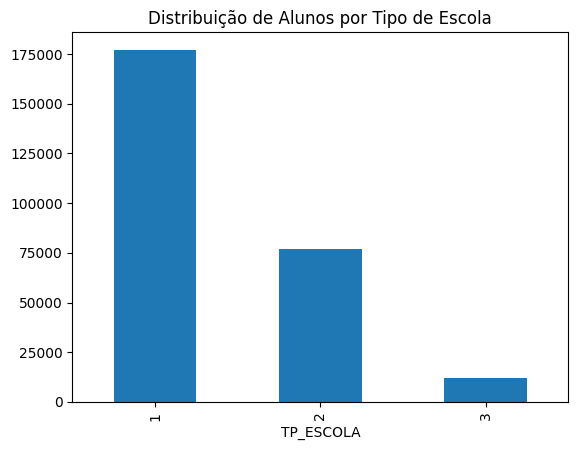

In [145]:
df.TP_ESCOLA.value_counts().plot(kind='bar')
plt.title('Distribuição de Alunos por Tipo de Escola')

Text(0.5, 1.0, 'Distribuição de Alunos por Sexo')

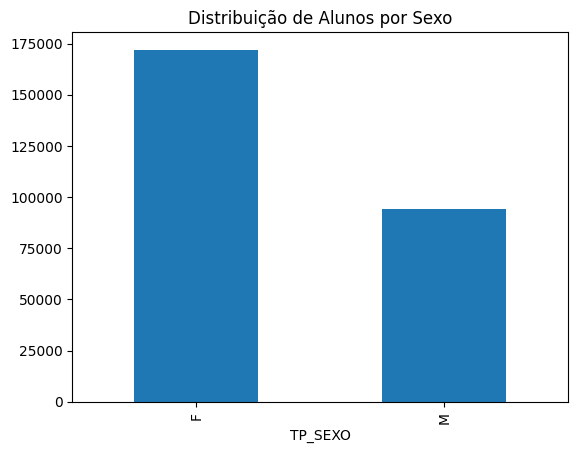

In [146]:
df.TP_SEXO.value_counts().plot(kind='bar')
plt.title('Distribuição de Alunos por Sexo')

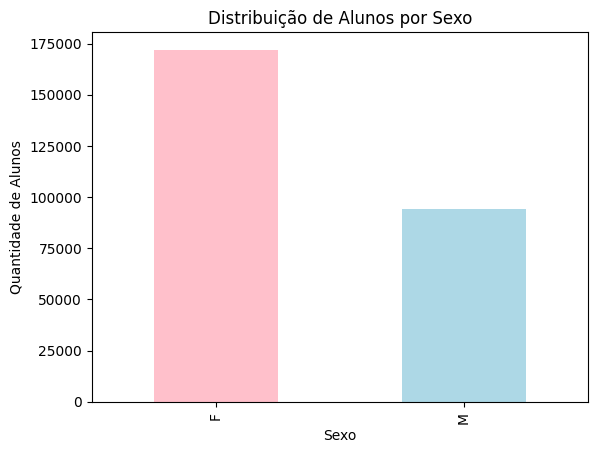

In [147]:
# Melhorando a visualização:
# Gráfico de barras com cor preta
df.TP_SEXO.value_counts().plot(kind='bar', color=['pink', 'lightblue'])
# Adicionando título ao gráfico
plt.title('Distribuição de Alunos por Sexo')
# Label do eixo x
plt.xlabel('Sexo')
# Label do eixo y
plt.ylabel('Quantidade de Alunos')

plt.show()

<Axes: title={'center': 'Distribuição de Alunos por Tipo de Escola'}, xlabel='Tipo de Escola', ylabel='Quantidade de Alunos'>

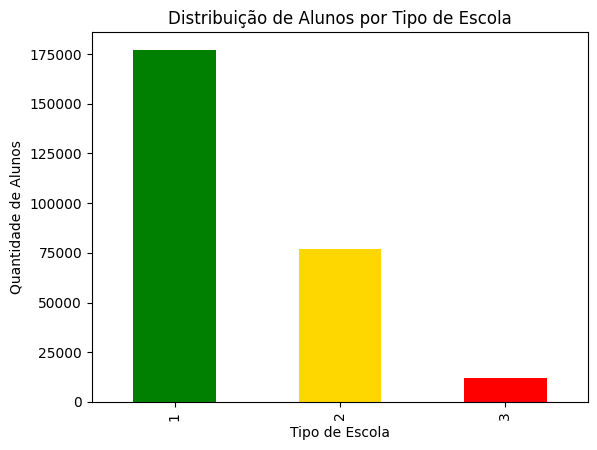

In [148]:
# Uma só linha de código para gerar o gráfico
df.TP_ESCOLA.value_counts().plot(kind='bar', color=['green', 'gold', 'red'], title='Distribuição de Alunos por Tipo de Escola', xlabel='Tipo de Escola', ylabel='Quantidade de Alunos')

<Axes: title={'center': 'Distribuição de Alunos por Município (Top 15)'}, xlabel='Quantidade de Alunos', ylabel='Município'>

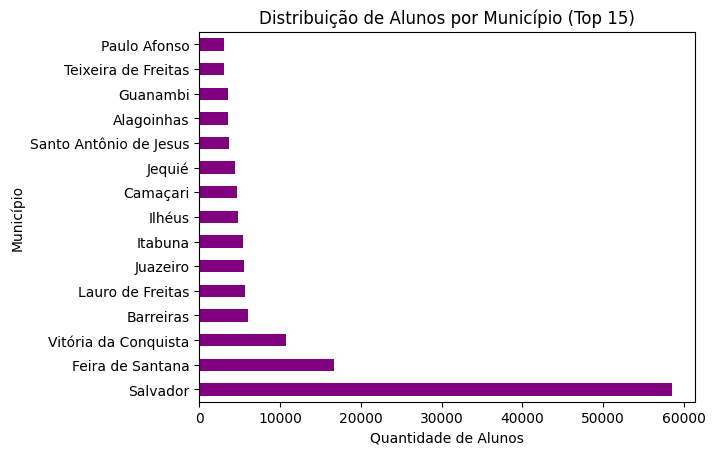

In [149]:
(df.NO_MUNICIPIO_PROVA
    .value_counts()
    .reset_index() # Reseta o índice para transformar a série em um DataFrame
    .rename(columns={
        'NO_MUNICIPIO_PROVA': 'Municipio',
        'count': 'Quantidade de Alunos',
    })
    .nlargest(n=15, columns='Quantidade de Alunos') # Seleciona os 15 maiores valores
    .set_index('Municipio')  # Define a coluna 'Municipio' como índice
    .plot(
        kind='barh',
        color='purple',
        legend=False,
        xlabel='Quantidade de Alunos',
        ylabel='Município',
        title='Distribuição de Alunos por Município (Top 15)'
    )
)

#### Gráfico de Pizza

- Proporção entre gêneros

<Axes: ylabel='count'>

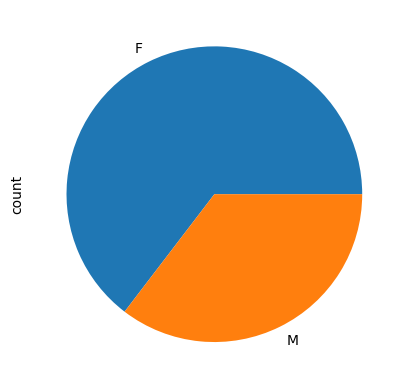

In [150]:
df.TP_SEXO.value_counts().plot(kind='pie')

- Tipo de escola

<Axes: ylabel='count'>

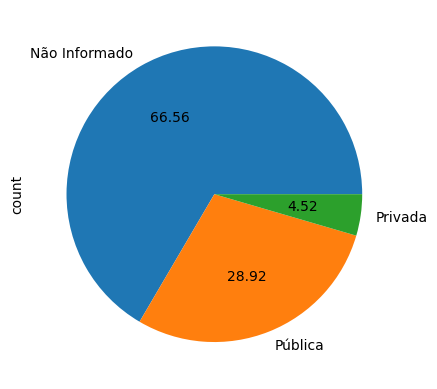

In [151]:
(
    df.TP_ESCOLA.map({1: 'Não Informado', 2: 'Pública', 3: 'Privada'})
    .value_counts()
    .plot(
        kind='pie',
        legend=False,
        autopct='%.2f',
    )
)

#### Gráfico de dispersão

- Dispersão das notas de Matemática e Ciências da Natureza

Text(0.5, 1.0, 'Dispersão das Notas de Matemática e Ciências da Natureza')

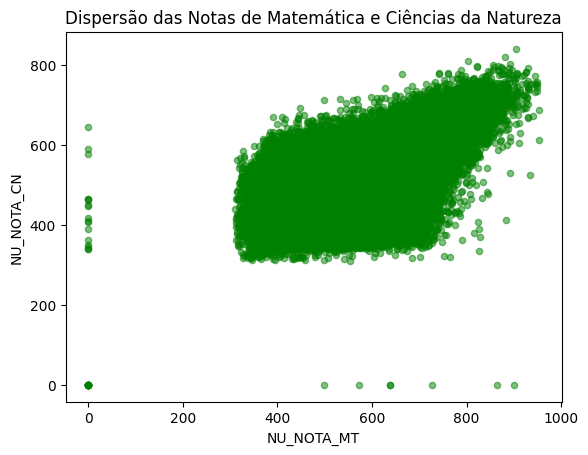

In [152]:
df.plot(kind='scatter', x='NU_NOTA_MT', y='NU_NOTA_CN', alpha=0.5, color='green')
plt.title('Dispersão das Notas de Matemática e Ciências da Natureza')

#### Box Plot

- Outliers da prova de Matemática

<Axes: >

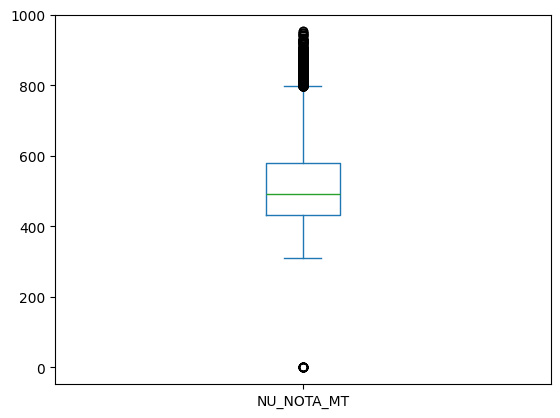

In [153]:
df.NU_NOTA_MT.plot(kind='box')

- Outliers de todas as provas

<Axes: >

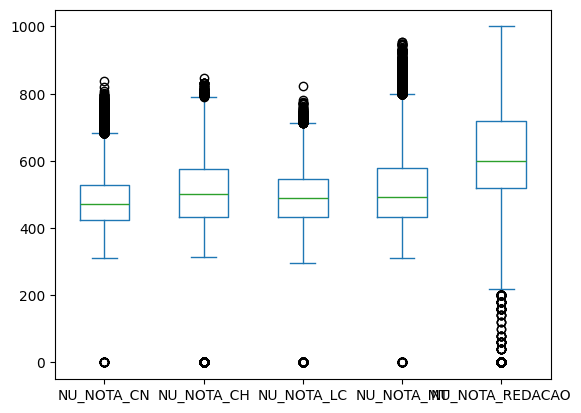

In [154]:
df[provas].plot(kind='box')

#### Gráfico de densidade - Kernel Density Estimation (KDE)

- Estimativa da função densidade de probabilidade da prova de matemática

<Axes: ylabel='Density'>

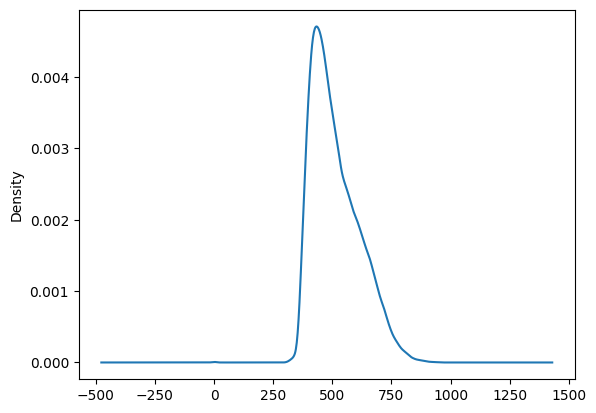

In [155]:
df.NU_NOTA_MT.plot(kind='kde')

#### Gráfico de linhas

<Axes: title={'center': 'Top 10 Municípios com Maior Média em Matemática (ENEM 2021)'}, xlabel='Município', ylabel='Média em Matemática'>

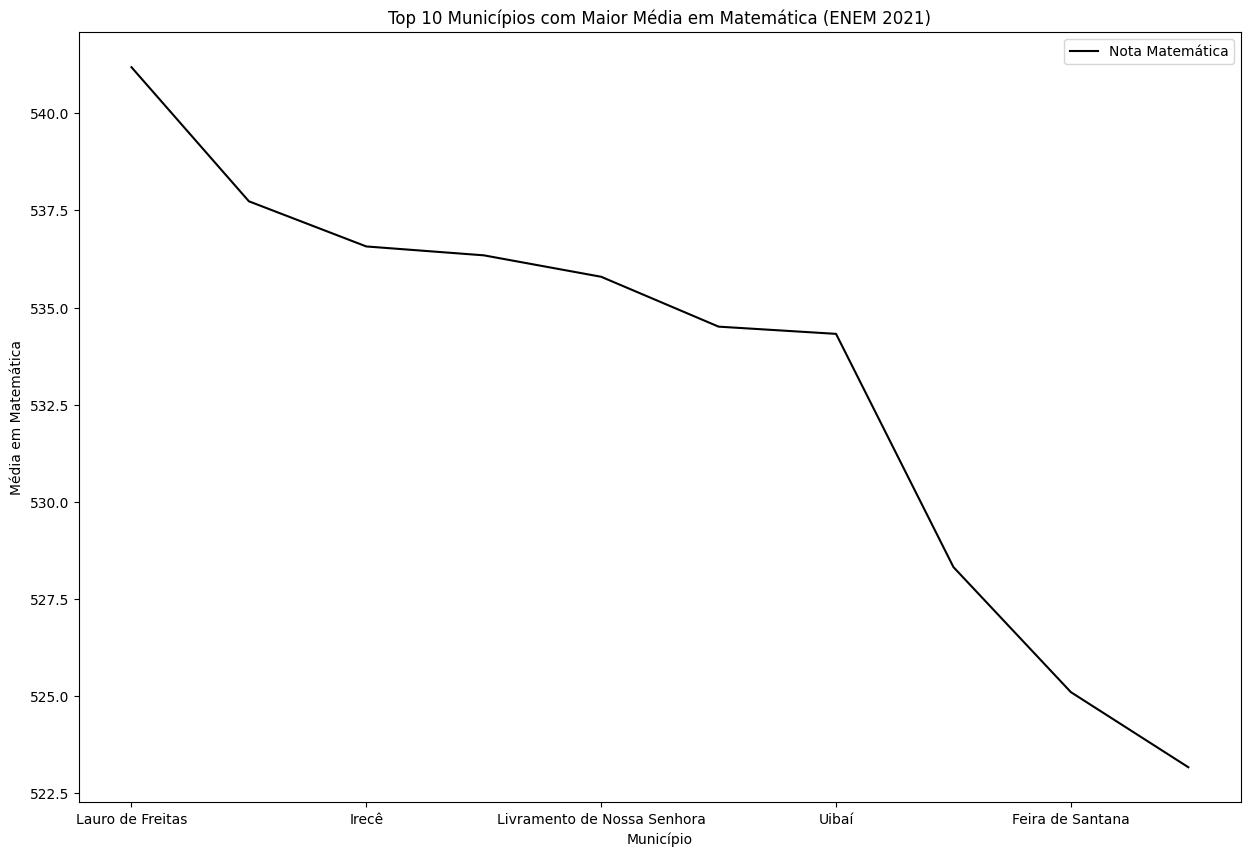

In [156]:
(
    df
    .groupby(by=['NO_MUNICIPIO_PROVA'])
    .agg({'NU_NOTA_MT': np.mean})
    .reset_index()
    .rename(columns={'NU_NOTA_MT': 'Nota Matemática', 'NO_MUNICIPIO_PROVA': 'Município'})
    .nlargest(n=10, columns='Nota Matemática')
    .plot(
        x='Município',
        y='Nota Matemática',
        figsize=(15, 10),
        color='k', # k é a abreviação para preto
        ylabel='Média em Matemática',
        title='Top 10 Municípios com Maior Média em Matemática (ENEM 2021)',
        # ylim=[520, 545]  # Define o limite do eixo y para melhor visualização
    )
)

## Desafio

> Elabore um gráfico de pareto com os estados e as maiores notas.

## Ordenação

Em alguns casos precisamos ordenar os dados por alguma coluna ou conjunto de colunas. No Pandas podemos utilizar a função ```.sort_values()```.

In [157]:
# Definindo um subset do DataFrame para análise
provas = df.columns[(df.columns.str.contains('NOTA')) & (~df.columns.str.contains('COMP'))].tolist()

idCandidato = ['NU_INSCRICAO']

# random_state serve para garantir que a amostra seja reproduzível
df_subset = df[idCandidato + provas].sample(n=10, random_state=9999)

In [158]:
# Ordena o DataFrame por NU_NOTA_MT, em ordem decrescente
df_subset.sort_values(by=['NU_NOTA_MT'], ascending=False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
227398,210051715408,590.7,665.7,559.3,729.0,720.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
171654,210051356897,468.6,500.2,422.8,354.5,380.0
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN


In [159]:
# Ordena o DataFrame por NU_NOTA_MT, em ordem crescente
df_subset.sort_values(by=['NU_NOTA_MT'], ascending=True)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
171654,210051356897,468.6,500.2,422.8,354.5,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
227398,210051715408,590.7,665.7,559.3,729.0,720.0
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN


In [160]:
# Ordena o DataFrame por NU_NOTA_MT, em ordem decrescente
# Ordena os valores NaN nas primeiras linhas
df_subset.sort_values(by=['NU_NOTA_MT'], na_position='first', ascending=False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN
227398,210051715408,590.7,665.7,559.3,729.0,720.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
171654,210051356897,468.6,500.2,422.8,354.5,380.0


In [161]:
# Ordena o DataFrame por NU_NOTA_MT, em ordem decrescente
# Ordena os valores NaN nas últimas linhas
df_subset.sort_values(by=['NU_NOTA_MT'], na_position='last', ascending=False)

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
227398,210051715408,590.7,665.7,559.3,729.0,720.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
171654,210051356897,468.6,500.2,422.8,354.5,380.0
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN


In [162]:
# Ordena o DataFrame por NU_NOTA_MT e NU_NOTA_CN, ambos em ordem decrescente
df_subset.sort_values(by=['NU_NOTA_MT', 'NU_NOTA_CN'], ascending=[False, False])

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
227398,210051715408,590.7,665.7,559.3,729.0,720.0
124717,210053777121,601.0,500.9,469.7,582.6,860.0
171946,210051590720,480.9,539.5,544.2,582.4,740.0
168634,210054247453,536.5,564.3,491.4,493.1,0.0
451,210053811122,396.0,427.9,469.9,460.8,360.0
212050,210052725187,361.3,395.5,433.9,427.3,380.0
53444,210051472302,435.4,553.1,432.1,424.8,640.0
171654,210051356897,468.6,500.2,422.8,354.5,380.0
255118,210053165833,NaN,NaN,NaN,NaN,NaN
57913,210053712582,NaN,NaN,NaN,NaN,NaN


#### Series

Nada mais é que uma coluna do DataFrame.

In [163]:
type(df.NU_NOTA_MT)

pandas.core.series.Series

In [164]:
df_subset.NU_NOTA_MT.sort_values()

171654    354.5
53444     424.8
212050    427.3
451       460.8
168634    493.1
171946    582.4
124717    582.6
227398    729.0
255118      NaN
57913       NaN
Name: NU_NOTA_MT, dtype: float64

In [165]:
df_subset.NU_NOTA_MT.sort_values(ascending=False, na_position='first')

255118      NaN
57913       NaN
227398    729.0
124717    582.6
171946    582.4
168634    493.1
451       460.8
212050    427.3
53444     424.8
171654    354.5
Name: NU_NOTA_MT, dtype: float64

#### Ranking

Em alguns casos, estaremos interessados em criar um ranking. Vamos filtrar a base de dados para os candidatos que fizeram a prova em Salvador e posteriormente criar um top 10 na prova de matemática.

In [166]:
# Filtrando alunos do municipio de Salvador
df_subset = df.query('NO_MUNICIPIO_PROVA == "Salvador"')[idCandidato + provas]
df_subset

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,210054173438,NaN,NaN,NaN,NaN,NaN
6,210053741476,453.4,438.3,503.4,379.5,600.0
9,210054171092,NaN,NaN,NaN,NaN,NaN
14,210053702687,603.3,622.5,571.7,729.2,860.0
17,210054087112,414.6,420.5,368.6,399.4,480.0
...,...,...,...,...,...,...
266183,210053939844,NaN,NaN,NaN,NaN,NaN
266188,210054023670,463.8,474.9,333.3,357.8,280.0
266191,210051995005,NaN,NaN,NaN,NaN,NaN
266192,210053234415,NaN,NaN,NaN,NaN,NaN


In [167]:
df_subset.sort_values(by=['NU_NOTA_MT'], ascending=False).iloc[:10, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
125578,210053255151,719.5,692.4,647.9,926.8,980.0


> Outra forma de fazer o mesmo e mais simples: usando o método ```.nlargest()``` e ```.nsmallest()``` (caso contrátrio).

In [168]:
df_subset.nlargest(n=10, columns='NU_NOTA_MT')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
50793,210051245410,717.1,774.0,669.3,926.8,920.0


In [169]:
# Analisando por mais de 1 coluna
df_subset.sort_values(by=['NU_NOTA_MT', 'NU_NOTA_CN'], ascending=False).iloc[:10, :]

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
125578,210053255151,719.5,692.4,647.9,926.8,980.0


In [170]:
# Caso houvesse duplicidade, poderíamos passar o argumento keep
# keep = first : Pega a primeira ocorrência
# keep = last : Pega a última ocorrência
# keep = all: Mantém todas as ocorrências, mesmo selecionando mais de n items
df_subset.nlargest(n=10, columns=['NU_NOTA_MT', 'NU_NOTA_CN'], keep='first')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
135490,210052672394,687.5,697.3,664.3,953.1,700.0
40487,210053271130,751.0,720.4,661.1,948.5,900.0
4954,210053763665,754.6,698.1,685.8,944.1,920.0
173100,210053596696,730.8,752.1,684.6,944.1,940.0
118896,210054147919,758.4,752.8,679.7,930.1,960.0
97902,210054079727,741.1,707.9,755.7,930.1,940.0
76017,210052520408,741.7,705.8,655.4,929.8,740.0
222974,210053348040,739.3,684.5,665.9,929.8,880.0
77165,210054118249,667.7,681.3,652.5,928.8,860.0
125578,210053255151,719.5,692.4,647.9,926.8,980.0


In [171]:
# Ranking com os alunos que obtiveram as menores notas em Matemática e Ciências da Natureza
df_subset.nsmallest(n=10, columns=['NU_NOTA_MT', 'NU_NOTA_CN'], keep='first')

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
216695,210054207985,0.0,328.9,364.2,0.0,0.0
237823,210054207908,0.0,389.1,343.9,0.0,820.0
237883,210052783728,339.7,749.7,723.1,0.0,440.0
256745,210051948246,343.3,403.4,337.4,0.0,0.0
151627,210053516497,389.2,0.0,328.7,0.0,0.0
36728,210052910938,448.4,0.0,366.3,0.0,600.0
99541,210052413138,461.9,340.8,381.5,0.0,620.0
40997,210053204001,577.5,611.7,637.3,0.0,740.0
263890,210053484663,426.6,502.8,516.5,315.3,600.0
264672,210051870014,421.6,513.2,483.5,315.4,480.0


## Índice

A indexação do Pandas conta as linhas e colunas a partir do zero, mas podemos alterar o índice default do DataFrame e ainda ordenar um DataFrame de acordo com seu índice. Em séries temporais, alterar o índice default pode facilitar o trabalho de filtro de datas.

- set_index()

In [172]:
# Observe que o índice é a contagem de linhas
df_subset

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,210054173438,NaN,NaN,NaN,NaN,NaN
6,210053741476,453.4,438.3,503.4,379.5,600.0
9,210054171092,NaN,NaN,NaN,NaN,NaN
14,210053702687,603.3,622.5,571.7,729.2,860.0
17,210054087112,414.6,420.5,368.6,399.4,480.0
...,...,...,...,...,...,...
266183,210053939844,NaN,NaN,NaN,NaN,NaN
266188,210054023670,463.8,474.9,333.3,357.8,280.0
266191,210051995005,NaN,NaN,NaN,NaN,NaN
266192,210053234415,NaN,NaN,NaN,NaN,NaN


In [173]:
# Define o index como a coluna 'NU_INSCRICAO'
df_subset.set_index('NU_INSCRICAO', inplace=True)  # inplace = True, altera o DataFrame original
df_subset

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,
210054173438,NaN,NaN,NaN,NaN,NaN
210053741476,453.4,438.3,503.4,379.5,600.0
210054171092,NaN,NaN,NaN,NaN,NaN
210053702687,603.3,622.5,571.7,729.2,860.0
210054087112,414.6,420.5,368.6,399.4,480.0
...,...,...,...,...,...
210053939844,NaN,NaN,NaN,NaN,NaN
210054023670,463.8,474.9,333.3,357.8,280.0
210051995005,NaN,NaN,NaN,NaN,NaN


- sort_index()

In [174]:
# Ordena o dataset de acordo com o índice
df_subset.sort_index()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,
210051014333,NaN,NaN,NaN,NaN,NaN
210051014348,NaN,NaN,NaN,NaN,NaN
210051014437,NaN,NaN,NaN,NaN,NaN
210051014463,NaN,NaN,NaN,NaN,NaN
210051014490,596.3,615.3,628.1,621.6,700.0
...,...,...,...,...,...
210054464474,NaN,NaN,NaN,NaN,NaN
210054464559,NaN,NaN,NaN,NaN,NaN
210054465053,405.5,456.6,401.3,399.7,500.0


#### Indexação Hierárquica (Multi Index)

Podemos escolher mais de uma coluna como índice do DataFrame, com efeito criamos um Multi Index.

In [175]:
# Faz uma cópia do DataFrame e pega uma amostra de 10 items
df_multiindex = df.copy().sample(10)

# Define dois índices diferentes, Município e Sexo
df_multiindex = df_multiindex.set_index(['NO_MUNICIPIO_PROVA', 'TP_SEXO'])

# Exibe o DataFrame
df_multiindex

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA  \
NO_MUNICIPIO_PROVA     TP_SEXO                                          
Campo Formoso          M        210051402029    2021                2   
Juazeiro               F        210053762746    2021                8   
Santo Antônio de Jesus F        210052519958    2021                7   
Caculé                 M        210052194358    2021                1   
Rio Real               M        210053268241    2021                6   
São Gonçalo dos Campos M        210053199506    2021                2   
Serrinha               F        210052747218    2021                3   
Salvador               M        210053289256    2021                4   
                       F        210051669019    2021                3   
                       M        210054458288    2021                2   

                                TP_ESTADO_CIVIL  TP_COR_RACA  \
NO_MUNICIPIO_PROVA     TP_SEXO                                 
Campo Formoso          M                      1            3   
Juazeiro               F                      1            2   
Santo Antônio de Jesus F                      1            1   
Caculé                 M                      1            3   
Rio Real               M                      1            2   
São Gonçalo dos Campos M                      1            3   
Serrinha               F                      0            1   
Salvador               M                      1            2   
                       F                      1            2   
                       M                      1            1   

                                TP_NACIONALIDADE  TP_ST_CONCLUSAO  \
NO_MUNICIPIO_PROVA     TP_SEXO                                      
Campo Formoso          M                       1                2   
Juazeiro               F                       1                1   
Santo Antônio de Jesus F                       1                2   
Caculé                 M                       1                3   
Rio Real               M                       1                1   
São Gonçalo dos Campos M                       1                2   
Serrinha               F                       1                2   
Salvador               M                       1                1   
                       F                       1                2   
                       M                       1                3   

                                TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  \
NO_MUNICIPIO_PROVA     TP_SEXO                                          
Campo Formoso          M                      0          2        1.0   
Juazeiro               F                      4          1        NaN   
Santo Antônio de Jesus F                      0          2        1.0   
Caculé                 M                      0          1        NaN   
Rio Real               M                      4          1        NaN   
São Gonçalo dos Campos M                      0          2        1.0   
Serrinha               F                      0          2        1.0   
Salvador               M                      2          1        NaN   
                       F                      0          2        1.0   
                       M                      0          1        NaN   

                                IN_TREINEIRO  CO_MUNICIPIO_ESC  \
NO_MUNICIPIO_PROVA     TP_SEXO                                   
Campo Formoso          M                   0               NaN   
Juazeiro               F                   0               NaN   
Santo Antônio de Jesus F                   0               NaN   
Caculé                 M                   1               NaN   
Rio Real               M                   0               NaN   
São Gonçalo dos Campos M                   0         2929305.0   
Serrinha               F                   0               NaN   
Salvador               M                   0               NaN   
                    

In [176]:
# Tipo Range Index (padrão)
print(type(df.index))

# Tipo Base Index (alterado com set_index)
print(type(df_subset.index))

# Tipo Multi Index
print(type(df_multiindex.index))

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.multi.MultiIndex'>


- reset_index()

In [177]:
# Reseta o índice para o formato original
# drop = False : Mantém as colunas que antes eram os índices
# drop = True : Remove as colunas que antes eram os índices
df_subset = df_subset.reset_index(drop=False)
df_subset

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,210054173438,NaN,NaN,NaN,NaN,NaN
1,210053741476,453.4,438.3,503.4,379.5,600.0
2,210054171092,NaN,NaN,NaN,NaN,NaN
3,210053702687,603.3,622.5,571.7,729.2,860.0
4,210054087112,414.6,420.5,368.6,399.4,480.0
...,...,...,...,...,...,...
58497,210053939844,NaN,NaN,NaN,NaN,NaN
58498,210054023670,463.8,474.9,333.3,357.8,280.0
58499,210051995005,NaN,NaN,NaN,NaN,NaN
58500,210053234415,NaN,NaN,NaN,NaN,NaN
